In [40]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
from sklearn.datasets import load_iris

iris = load_iris()

In [95]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.drop(["petal length (cm)","petal width (cm)"],axis=1,inplace=True)
df["target"] = iris.target

In [96]:
df0 = df[df["target"]==0]
df1 = df[df["target"]==1]
df2 = df[df["target"]==2]

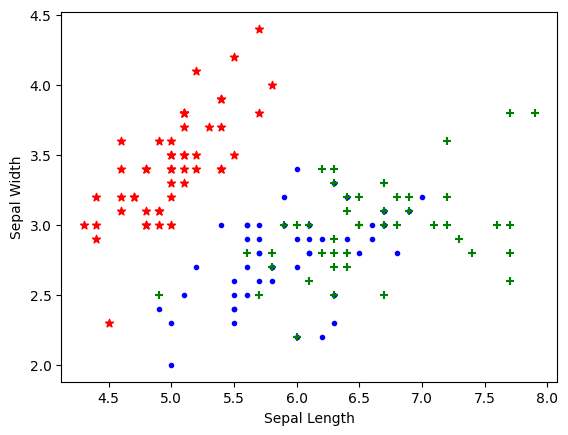

In [97]:
plt.scatter(df0["sepal length (cm)"],df0["sepal width (cm)"],color="red",marker="*")
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],color="blue",marker=".")
plt.scatter(df2["sepal length (cm)"],df2["sepal width (cm)"],color="green",marker="+")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

In [99]:
df

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [102]:
from sklearn.preprocessing import MinMaxScaler
cols = ["sepal length (cm)","sepal width (cm)"]

scaler = MinMaxScaler()
df[cols] = scaler.fit_transform(df[cols])
df

,sepal length (cm),sepal width (cm),target
0,0.222222,0.625000,0
1,0.166667,0.416667,0
2,0.111111,0.500000,0
3,0.083333,0.458333,0
4,0.194444,0.666667,0
...,...,...,...
145,0.666667,0.416667,2
146,0.555556,0.208333,2
147,0.611111,0.416667,2
148,0.527778,0.583333,2


In [133]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df.drop("target",axis=1))

In [134]:
df["predicted class"] = y_predicted

In [135]:
df

,sepal length (cm),sepal width (cm),target,predicted class
0,0.222222,0.625000,0,2
1,0.166667,0.416667,0,2
2,0.111111,0.500000,0,2
3,0.083333,0.458333,0,2
4,0.194444,0.666667,0,2
...,...,...,...,...
145,0.666667,0.416667,2,1
146,0.555556,0.208333,2,0
147,0.611111,0.416667,2,1
148,0.527778,0.583333,2,1


In [136]:
df0 = df[df["predicted class"] == 0]
df1 = df[df["predicted class"] == 1]
df2 = df[df["predicted class"] == 2]


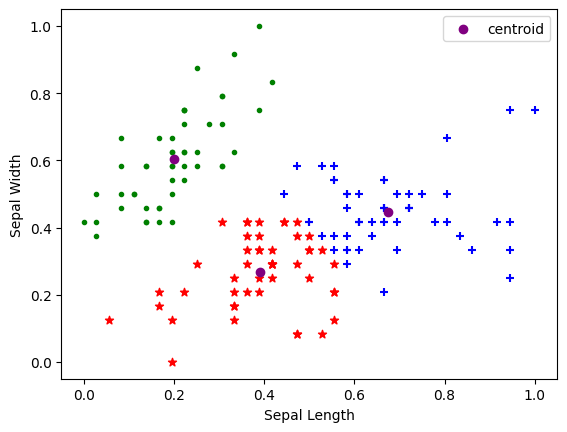

In [137]:
plt.scatter(df0["sepal length (cm)"],df0["sepal width (cm)"],color="red",marker="*")
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],color="blue",marker="+")
plt.scatter(df2["sepal length (cm)"],df2["sepal width (cm)"],color="green",marker=".")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="o",label="centroid")
# plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*",label="centroid")

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

In [117]:
df

,sepal length (cm),sepal width (cm),target,predicted class
0,0.222222,0.625000,0,1
1,0.166667,0.416667,0,1
2,0.111111,0.500000,0,1
3,0.083333,0.458333,0,1
4,0.194444,0.666667,0,1
...,...,...,...,...
145,0.666667,0.416667,2,2
146,0.555556,0.208333,2,0
147,0.611111,0.416667,2,2
148,0.527778,0.583333,2,2


In [118]:
k_rng = range(1,10)
sse = []


for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df.drop(["target","predicted class"],axis=1))
  sse.append(km.inertia_)

In [119]:
sse

[12.797757201646087,
 7.1168486133589015,
 4.137446609550965,
 3.402790845289639,
 2.5794212361321676,
 2.1147877651304188,
 1.9324019646405821,
 1.5950501418847882,
 1.398836684470365]

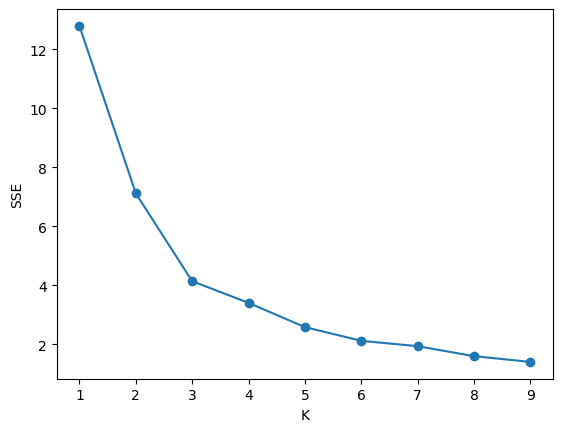

In [122]:
plt.plot(k_rng,sse,marker="o")
plt.xlabel("K")
plt.ylabel("SSE")
plt.show()